# Practica 3

Un dataset de NOAA está almacenado en el archivo `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. Este es el dataset que utilizaremos para la práctica.

Nota: Los datos para esta práctica forman parte de un dataset perteneciente a The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). El GHCN-Daily se compone de registros climáticos diarios de miles de estaciones de la superficie terrestre en todo el mundo.

Cada fila en el archivo de datos corresponde a una sola observación.

Nos proporciona las siguientes variables:

- **ID** : código de identificación de la estación
- **Date** : fecha en formato YYYY-MM-DD (por ejemplo: 2012-01-24 = 24 de enero de 2012)
- **Element** : indica el tipo de medición
    - **TMAX** : Temperatura máxima
    - **TMIN** : Temperatura mínima
- **Data_Value**: valor de la temperatura (en décimas de grados centígrados)

## Indicaciones

1. Lee la documentación y familiarícese con el conjunto de datos, luego escriba un código python que arroje un gráfico lineal de las temperaturas máximas y mínimas récord por día del año durante el período 2005-2014. El área entre las temperaturas máximas y mínimas récord de cada día debe estar sombreada.
2. Superponga una dispersión de los datos de 2015 para cualquier punto (máximos y mínimos) para los cuales se superó el récord de diez años (2005-2014) máximo o mínimo histórico en 2015.
3. Debes tener cuidado con los días bisiestos (es decir, el 29 de febrero), es totalmente razonable eliminar estos puntos del conjunto de datos para esta visualización.
4. ¡Haz que la imagen sea agradable! Considera problemas como leyendas, etiquetas y líneas en demasía.

Los datos proporcionados están cerca de **Ann Arbor, Michigan, Estados Unidos**, y las estaciones de donde provienen los datos se muestran en el siguiente mapa.

## Importación de Librerías para Análisis de Datos Climáticos
- Pandas para manejo de datos
- NumPy para cálculos numéricos
- Matplotlib para visualización
- Datetime para manipulación de fechas
- Seaborn para mejora de estilos gráficos

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

## Carga y Preprocesamiento del Dataset Climático
- Lee el archivo CSV de datos de temperaturas
- Convierte la columna 'Date' a formato datetime
- Extrae el día del año de cada registro
- Elimina los registros del 29 de febrero (días bisiestos)

In [9]:
df = pd.read_csv('../data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['day_of_year'] = df['Date'].dt.dayofyear
df = df[~((df['Date'].dt.month == 2) & (df['Date'].dt.day == 29))]
df.head()

,ID,Date,Element,Data_Value,day_of_year
0,USW00094889,2014-11-12,TMAX,22,316
1,USC00208972,2009-04-29,TMIN,56,119
2,USC00200032,2008-05-26,TMAX,278,147
3,USC00205563,2005-11-11,TMAX,139,315
4,USC00200230,2014-02-27,TMAX,-106,58


## División del Dataset por Períodos Temporales
- Separa los datos históricos (2005-2014)
- Aísla los datos específicos del año 2015

In [10]:
historical_data = df[df['Date'].dt.year < 2015]
data_2015 = df[df['Date'].dt.year == 2015]

print("Registros históricos (2005-2014):", len(historical_data))
print("Registros 2015:", len(data_2015))

Registros históricos (2005-2014): 151245
Registros 2015: 13757


## Funciones de Procesamiento y Análisis de Datos
- `calculate_records()`: Calcula temperaturas récord (máximas/mínimas) por día
- `find_broken_records()`: Identifica récords superados en 2015
- `tenths_to_celsius()`: Convierte temperaturas de décimas de grado a grados Celsius

In [11]:
def calculate_records(data, element):
    """Calcula los récords (máximos o mínimos) por día del año"""
    if element == 'TMAX':
        records = data[data['Element'] == 'TMAX'].groupby('day_of_year')['Data_Value'].max()
    else:
        records = data[data['Element'] == 'TMIN'].groupby('day_of_year')['Data_Value'].min()

    all_days = pd.Series(index=range(1, 366))
    records = records.reindex(all_days.index)
    return records

def find_broken_records(data_2015, historical_records, element):
    """Encuentra los récords superados en 2015"""
    if element == 'TMAX':
        daily_values = data_2015[data_2015['Element'] == 'TMAX'].groupby('day_of_year')['Data_Value'].max()
        common_days = daily_values.index.intersection(historical_records.index)
        daily_values = daily_values.reindex(common_days)
        hist_values = historical_records.reindex(common_days)
        broken_records = daily_values[daily_values > hist_values]
    else:
        daily_values = data_2015[data_2015['Element'] == 'TMIN'].groupby('day_of_year')['Data_Value'].min()
        common_days = daily_values.index.intersection(historical_records.index)
        daily_values = daily_values.reindex(common_days)
        hist_values = historical_records.reindex(common_days)
        broken_records = daily_values[daily_values < hist_values]
    return broken_records

def tenths_to_celsius(temp):
    """Convierte temperaturas de décimas de grado a grados Celsius"""
    return temp / 10

## Identificación de Registros de Temperatura
- Calcula temperaturas máximas y mínimas históricas por día
- Detecta récords superados en 2015 para temperaturas máximas y mínimas

In [12]:
historical_max = calculate_records(historical_data, 'TMAX')
historical_min = calculate_records(historical_data, 'TMIN')

broken_max_2015 = find_broken_records(data_2015, historical_max, 'TMAX')
broken_min_2015 = find_broken_records(data_2015, historical_min, 'TMIN')

print("Récords máximos superados en 2015:", len(broken_max_2015))
print("Récords mínimos superados en 2015:", len(broken_min_2015))

Récords máximos superados en 2015: 34
Récords mínimos superados en 2015: 32


## Generación del Gráfico de Temperaturas Récord
- Configura el estilo visual del gráfico
- Grafica temperaturas máximas y mínimas históricas
- Sombrea el área entre máximas y mínimas
- Añade puntos para récords superados en 2015
- Personaliza etiquetas, título y leyenda
- Ajusta elementos de presentación del gráfico

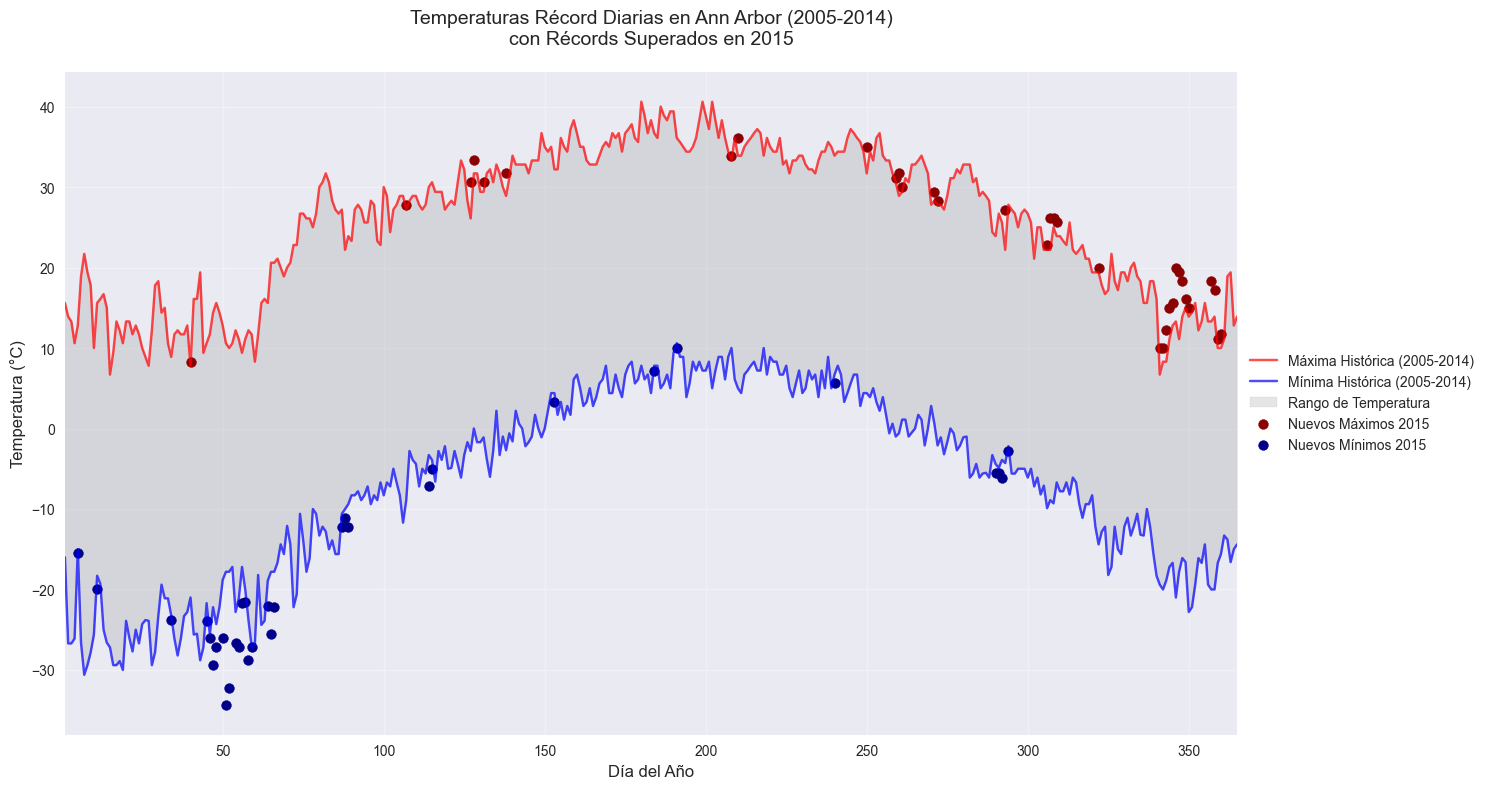

In [13]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(15, 8))

days = list(range(1, 366))

# Graficar
plt.plot(days, tenths_to_celsius(historical_max), 'r-', 
         label='Máxima Histórica (2005-2014)', alpha=0.7)
plt.plot(days, tenths_to_celsius(historical_min), 'b-', 
         label='Mínima Histórica (2005-2014)', alpha=0.7)

# Sombrear área entre máximas y mínimas
plt.fill_between(days, 
                 tenths_to_celsius(historical_max), 
                 tenths_to_celsius(historical_min), 
                 alpha=0.2, 
                 color='gray',
                 label='Rango de Temperatura')

# Agregar récords superados en 2015
if len(broken_max_2015) > 0:
    plt.scatter(broken_max_2015.index, 
               tenths_to_celsius(broken_max_2015.values), 
               color='darkred', 
               s=50, 
               label='Nuevos Máximos 2015')
if len(broken_min_2015) > 0:
    plt.scatter(broken_min_2015.index, 
               tenths_to_celsius(broken_min_2015.values), 
               color='darkblue', 
               s=50, 
               label='Nuevos Mínimos 2015')

# Configurar el gráfico
plt.title('Temperaturas Récord Diarias en Ann Arbor (2005-2014)\ncon Récords Superados en 2015', 
          fontsize=14, 
          pad=20)
plt.xlabel('Día del Año', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)

# Ajustar ejes y elementos visuales
plt.xlim(1, 365)
plt.grid(True, alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

plt.show()

## Análisis Estadístico de Récords de 2015
- Calcula y muestra temperatura máxima más alta
- Presenta promedio de máximas superadas
- Calcula y muestra temperatura mínima más baja
- Presenta promedio de mínimas superadas

In [14]:
if len(broken_max_2015) > 0:
    print("\nEstadísticas de máximas superadas en 2015:")
    print(f"Temperatura máxima más alta: {tenths_to_celsius(broken_max_2015.max()):.1f}°C")
    print(f"Promedio de máximas superadas: {tenths_to_celsius(broken_max_2015.mean()):.1f}°C")

if len(broken_min_2015) > 0:
    print("\nEstadísticas de mínimas superadas en 2015:")
    print(f"Temperatura mínima más baja: {tenths_to_celsius(broken_min_2015.min()):.1f}°C")
    print(f"Promedio de mínimas superadas: {tenths_to_celsius(broken_min_2015.mean()):.1f}°C")


Estadísticas de máximas superadas en 2015:
Temperatura máxima más alta: 36.1°C
Promedio de máximas superadas: 22.8°C

Estadísticas de mínimas superadas en 2015:
Temperatura mínima más baja: -34.3°C
Promedio de mínimas superadas: -16.3°C
